# Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools
import statistics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

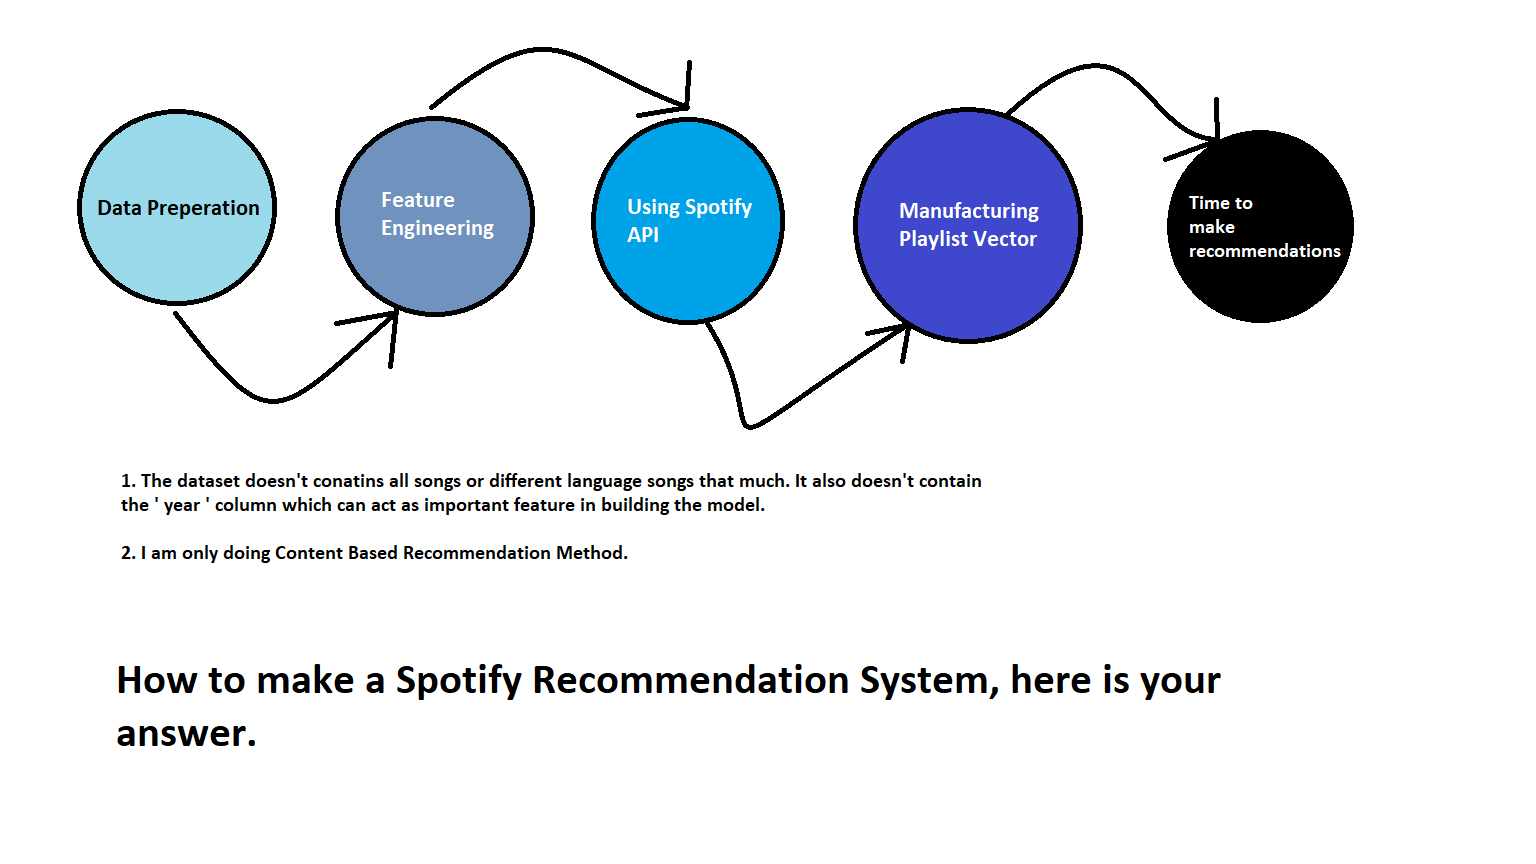

In [134]:
from IPython.display import Image
Image("intro.png")

# Reading the data and cutomizing it

In [77]:
sp_df = pd.read_csv('SpotifyFeatures.csv')

In [78]:
sp_df['artist_name']=sp_df['artist_name'].str.upper()
sp_df['track_name']=sp_df['track_name'].str.upper()
sp_df['name']=sp_df['track_name']

In [79]:
sp_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name
0,Movie,HENRI SALVADOR,C'EST BEAU DE FAIRE UN SHOW,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,C'EST BEAU DE FAIRE UN SHOW
1,Movie,MARTIN & LES FÉES,PERDU D'AVANCE (PAR GAD ELMALEH),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,PERDU D'AVANCE (PAR GAD ELMALEH)
2,Movie,JOSEPH WILLIAMS,DON'T LET ME BE LONELY TONIGHT,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,DON'T LET ME BE LONELY TONIGHT
3,Movie,HENRI SALVADOR,DIS-MOI MONSIEUR GORDON COOPER,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,DIS-MOI MONSIEUR GORDON COOPER
4,Movie,FABIEN NATAF,OUVERTURE,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,OUVERTURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,SLAVE,SON OF SLIDE,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,SON OF SLIDE
232721,Soul,JR THOMAS & THE VOLCANOS,BURNING FIRE,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,BURNING FIRE
232722,Soul,MUDDY WATERS,(I'M YOUR) HOOCHIE COOCHIE MAN,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,(I'M YOUR) HOOCHIE COOCHIE MAN
232723,Soul,R.LUM.R,WITH MY WORDS,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,WITH MY WORDS


# Data Exploration

In [80]:
sp_df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
name                 object
dtype: object

In [81]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [82]:
sp_df.shape

(232725, 19)

In [83]:
sp_df['genre'].values[0]

'Movie'

In [84]:
sp_df['artist_name'].values[0]

'HENRI SALVADOR'

In [85]:
sp_df[sp_df['artist_name']=='HARRY STYLES']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name
13728,Dance,HARRY STYLES,SIGN OF THE TIMES,5Ohxk2dO5COHF1krpoPigN,79,0.027500,0.516,340707,0.595,0.000000,F,0.1090,-4.630,Major,0.0313,119.972,4/4,0.222,SIGN OF THE TIMES
14004,Dance,HARRY STYLES,KIWI,33SNO8AaciGbNaQFkxvPrW,72,0.000640,0.375,176387,0.930,0.000000,D,0.3180,-2.631,Major,0.0561,147.124,4/4,0.491,KIWI
14214,Dance,HARRY STYLES,TWO GHOSTS,4B1rpPmQXwj78wk6aIGwwU,72,0.234000,0.386,229813,0.407,0.000002,F#,0.0999,-7.095,Minor,0.0268,69.387,4/4,0.456,TWO GHOSTS
14563,Dance,HARRY STYLES,WOMAN,33bURv895AN4FkBvgFo2dx,66,0.016900,0.624,278800,0.647,0.003800,D#,0.2210,-4.680,Minor,0.0335,136.022,4/4,0.379,WOMAN
14622,Dance,HARRY STYLES,EVER SINCE NEW YORK,5LABCxgmP7DATATIJXOh6n,66,0.200000,0.389,253387,0.537,0.000003,A#,0.1250,-6.761,Major,0.0309,127.964,5/4,0.383,EVER SINCE NEW YORK
14687,Dance,HARRY STYLES,CAROLINA,3Dwq1oiOFys6Sxr5SslmXw,66,0.000569,0.624,189613,0.673,0.000002,E,0.1040,-4.017,Minor,0.0268,121.986,4/4,0.458,CAROLINA
14883,Dance,HARRY STYLES,ONLY ANGEL,5Lbsc65org0b85kNsPkluY,65,0.287000,0.554,291080,0.842,0.000000,F,0.1060,-4.113,Major,0.0397,114.036,4/4,0.348,ONLY ANGEL
17726,Dance,HARRY STYLES,"TWO GHOSTS - RECORDED AT METROPOLIS STUDIOS, L...",1GDF5AusV7p0wwi4OVNz3i,57,0.475000,0.535,224256,0.231,0.000000,F#,0.1020,-10.827,Minor,0.0311,133.625,4/4,0.291,"TWO GHOSTS - RECORDED AT METROPOLIS STUDIOS, L..."
108591,Pop,HARRY STYLES,SIGN OF THE TIMES,5Ohxk2dO5COHF1krpoPigN,79,0.027500,0.516,340707,0.595,0.000000,F,0.1090,-4.630,Major,0.0313,119.972,4/4,0.222,SIGN OF THE TIMES
108948,Pop,HARRY STYLES,"GIRL CRUSH - RECORDED AT METROPOLIS STUDIOS, L...",4YutJsNwBBInE8vemufpQ8,74,0.658000,0.468,243805,0.197,0.000000,E,0.1090,-11.727,Major,0.0330,144.212,3/4,0.249,"GIRL CRUSH - RECORDED AT METROPOLIS STUDIOS, L..."


Note :
1. This dataset is a great one because it contains many numerical varibles such as liveness, tempo, valence, etc.
2. This variables can be used to make great features for the model.
3. It also includes the genre of the music which helps a lot.
4. It doesn't contain a 'year' column which can helpful for the model to be more accurate.

In [86]:
sp_df[sp_df['track_id']=='5Q0Nhxo0l2bP3pNjpGJwV1'].nunique()

genre               2
artist_name         1
track_name          1
track_id            1
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
time_signature      1
valence             1
name                1
dtype: int64

Note( for the below code ) :

As there are multiple duplicate 'track_id' with all the same column except columns 'genre' and 'popularity'. I am generating a list to store all the data in a single column and deleting the other duplicates.

In [87]:
id_genres = sp_df.groupby('track_id')['genre'].apply(list).reset_index()

In [88]:
id_popularity = sp_df.groupby('track_id')['popularity'].apply(list).reset_index()

In [89]:
id_genres

,track_id,genre
0,00021Wy6AyMbLP2tqij86e,[Anime]
1,000CzNKC8PEt1yC3L8dqwV,[Movie]
2,000DfZJww8KiixTKuk9usJ,[Reggae]
3,000EWWBkYaREzsBplYjUag,[Jazz]
4,000xQL6tZNLJzIrtIgxqSl,"[Dance, Pop]"
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,[Jazz]
176770,7zzFNNxVD0h0ctAT08H0pa,[Jazz]
176771,7zzTeItz93lYI52hlcipm5,[Reggaeton]
176772,7zzZmpw8L66ZPjH1M6qmOs,"[Children’s Music, Indie]"


In [90]:
id_popularity

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,[13]
1,000CzNKC8PEt1yC3L8dqwV,[5]
2,000DfZJww8KiixTKuk9usJ,[30]
3,000EWWBkYaREzsBplYjUag,[39]
4,000xQL6tZNLJzIrtIgxqSl,"[70, 70]"
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,[38]
176770,7zzFNNxVD0h0ctAT08H0pa,[40]
176771,7zzTeItz93lYI52hlcipm5,[28]
176772,7zzZmpw8L66ZPjH1M6qmOs,"[67, 67]"


In [91]:
sp_df.drop(['genre','popularity'], axis=1, inplace=True)

In [92]:
sp_df.drop_duplicates(inplace=True)

In [93]:
sp_df=sp_df.merge(id_genres[['track_id','genre']], on = 'track_id',how = 'left')
sp_df=sp_df.merge(id_popularity[['track_id','popularity']], on = 'track_id',how = 'left')


# Feature Engineering

In [94]:
sp_df.head()

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name,genre,popularity
0,HENRI SALVADOR,C'EST BEAU DE FAIRE UN SHOW,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,C'EST BEAU DE FAIRE UN SHOW,[Movie],[0]
1,MARTIN & LES FÉES,PERDU D'AVANCE (PAR GAD ELMALEH),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,PERDU D'AVANCE (PAR GAD ELMALEH),[Movie],[1]
2,JOSEPH WILLIAMS,DON'T LET ME BE LONELY TONIGHT,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,DON'T LET ME BE LONELY TONIGHT,[Movie],[3]
3,HENRI SALVADOR,DIS-MOI MONSIEUR GORDON COOPER,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,DIS-MOI MONSIEUR GORDON COOPER,[Movie],[0]
4,FABIEN NATAF,OUVERTURE,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,OUVERTURE,[Movie],[4]


## 1. Normalizing float variables

In [96]:
float_cols = sp_df.dtypes[sp_df.dtypes == 'float64'].index.values

## 2.Preparing for OHE Popularity 

In [95]:
sp_df['mean_popularity'] = [np.array(x).mean() for x in sp_df.popularity.values]

In [97]:
ohecol = 'mean_popularity'

In [98]:
sp_df['mean_popularity'].describe()

count    176906.000000
mean         36.428992
std          17.505539
min           0.000000
25%          25.000000
50%          37.000000
75%          49.000000
max         100.000000
Name: mean_popularity, dtype: float64

In [100]:
sp_df['popularitybucket'] = sp_df['mean_popularity'].apply(lambda x: int(x/5))

## 3. Make multiple feature using ' Tempo '

In [99]:
sp_df['tempo'].describe()

count    176906.000000
mean        117.209987
std          31.325074
min          30.379000
25%          92.006000
50%         115.009000
75%         138.814250
max         242.903000
Name: tempo, dtype: float64

In [101]:
sp_df.loc[ sp_df['tempo'] <= 30.00, 'cat_tempo'] = 0
sp_df.loc[(sp_df['tempo'] > 30.00) & (sp_df['tempo'] <= 40.00), 'cat_tempo'] = 1
sp_df.loc[(sp_df['tempo'] > 40.00) & (sp_df['tempo'] <= 60.0), 'cat_tempo']   = 2
sp_df.loc[(sp_df['tempo'] > 60.00) & (sp_df['tempo'] <= 66.00), 'cat_tempo']   = 3
sp_df.loc[(sp_df['tempo'] > 66.00) & (sp_df['tempo'] <= 80.00), 'cat_tempo']   = 4
sp_df.loc[(sp_df['tempo'] > 80.00) & (sp_df['tempo'] <= 108.00), 'cat_tempo']   = 5
sp_df.loc[(sp_df['tempo'] > 108.00) & (sp_df['tempo'] <= 124.00), 'cat_tempo']   = 6
sp_df.loc[(sp_df['tempo'] > 124.00) & (sp_df['tempo'] <= 168.00), 'cat_tempo']   = 7
sp_df.loc[(sp_df['tempo'] > 168.00) & (sp_df['tempo'] <= 176.00), 'cat_tempo']   = 8
sp_df.loc[(sp_df['tempo'] > 176.00) & (sp_df['tempo'] <= 200.00), 'cat_tempo']   = 9
sp_df.loc[ sp_df['tempo'] > 200, 'cat_tempo'] = 10
sp_df['cat_tempo'] = sp_df['cat_tempo'].astype(int)

In [102]:
sp_df

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,name,genre,popularity,mean_popularity,popularitybucket,cat_tempo
0,HENRI SALVADOR,C'EST BEAU DE FAIRE UN SHOW,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,...,0.0525,166.969,4/4,0.814,C'EST BEAU DE FAIRE UN SHOW,[Movie],[0],0.0,0,7
1,MARTIN & LES FÉES,PERDU D'AVANCE (PAR GAD ELMALEH),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,...,0.0868,174.003,4/4,0.816,PERDU D'AVANCE (PAR GAD ELMALEH),[Movie],[1],1.0,0,8
2,JOSEPH WILLIAMS,DON'T LET ME BE LONELY TONIGHT,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,...,0.0362,99.488,5/4,0.368,DON'T LET ME BE LONELY TONIGHT,[Movie],[3],3.0,0,5
3,HENRI SALVADOR,DIS-MOI MONSIEUR GORDON COOPER,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,...,0.0395,171.758,4/4,0.227,DIS-MOI MONSIEUR GORDON COOPER,[Movie],[0],0.0,0,8
4,FABIEN NATAF,OUVERTURE,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,...,0.0456,140.576,4/4,0.390,OUVERTURE,[Movie],[4],4.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176901,JOHN LEGEND,QUICKLY (FEAT. BRANDY),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,...,0.1000,99.991,4/4,0.770,QUICKLY (FEAT. BRANDY),[Soul],[39],39.0,7,5
176902,BELLY,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,...,0.2130,175.666,4/4,0.482,P.O.P.,[Soul],[43],43.0,8,8
176903,"BOBBY ""BLUE"" BLAND",I'LL TAKE CARE OF YOU - SINGLE VERSION,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,...,0.0436,80.023,4/4,0.497,I'LL TAKE CARE OF YOU - SINGLE VERSION,[Soul],[32],32.0,6,5
176904,JR THOMAS & THE VOLCANOS,BURNING FIRE,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,...,0.0337,113.830,4/4,0.969,BURNING FIRE,[Soul],[38],38.0,7,6


In [103]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176906 entries, 0 to 176905
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       176906 non-null  object 
 1   track_name        176906 non-null  object 
 2   track_id          176906 non-null  object 
 3   acousticness      176906 non-null  float64
 4   danceability      176906 non-null  float64
 5   duration_ms       176906 non-null  int64  
 6   energy            176906 non-null  float64
 7   instrumentalness  176906 non-null  float64
 8   key               176906 non-null  object 
 9   liveness          176906 non-null  float64
 10  loudness          176906 non-null  float64
 11  mode              176906 non-null  object 
 12  speechiness       176906 non-null  float64
 13  tempo             176906 non-null  float64
 14  time_signature    176906 non-null  object 
 15  valence           176906 non-null  float64
 16  name              17

## OHE Preparation

In [104]:
def ohe_prep(df, column, new_name): 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

## TF-IDF(Term Frequency — Inverse Document Frequency)

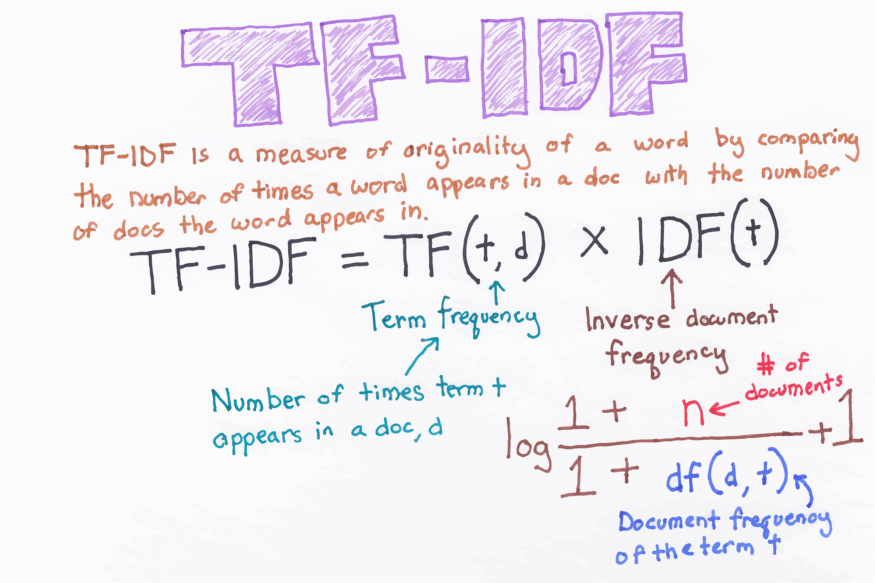

In [2]:
from IPython.display import Image
Image('tfidf.png')

In [105]:
def create_feature_set(df, float_cols):
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(sp_df['genre'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)

    tempo_ohe = ohe_prep(df, 'cat_tempo','ctempo') * 0.5
    popularity_ohe = ohe_prep(sp_df, 'popularitybucket','pbucket') * 0.15

    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    #concanenate all features
    final = pd.concat([genre_df, floats_scaled, popularity_ohe,tempo_ohe], axis = 1)
     
    #add song id
    final['track_id']=sp_df['track_id'].values
    
    return final

In [106]:
complete_feature_set = create_feature_set(sp_df, float_cols=float_cols)

In [107]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(complete_feature_set.head(5))


   genre|alternative  genre|anime  genre|blues  genre|capella  genre|children  \
0                0.0          0.0          0.0            0.0             0.0   
1                0.0          0.0          0.0            0.0             0.0   
2                0.0          0.0          0.0            0.0             0.0   
3                0.0          0.0          0.0            0.0             0.0   
4                0.0          0.0          0.0            0.0             0.0   

   genre|classical  genre|comedy  genre|country  genre|dance  \
0              0.0           0.0            0.0          0.0   
1              0.0           0.0            0.0          0.0   
2              0.0           0.0            0.0          0.0   
3              0.0           0.0            0.0          0.0   
4              0.0           0.0            0.0          0.0   

   genre|electronic  genre|folk  genre|hip  genre|hop  genre|indie  \
0               0.0         0.0        0.0        0.0     

# Connecting to Spotify API

https://developer.spotify.com/dashboard/( how to make a spotify developer account )

In [108]:
clientid='8bcfe563f2b4441290539a7e4a4f0d9c'
clientsecret='b01eb6f1b11840b8a1d310f2f402c4fe'

In [109]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [110]:
auth_manager = SpotifyClientCredentials(client_id=clientid, client_secret=clientsecret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [111]:
token = util.prompt_for_user_token(scope, client_id= clientid, client_secret=clientsecret, redirect_uri='http://localhost:8881/')

In [112]:
sp = spotipy.Spotify(auth=token)

In [113]:
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']

In [114]:
id_name

{'Amar ': '6nG4lZQbWC12dkuLNStAdz', 'Mixed Feelings': '5caChlCh49VIgZ3tyKO3zW'}

In [115]:
def create_necessary_outputs(playlist_name,id_dic, df):    

    playlist = pd.DataFrame()
    playlist_name = playlist_name
    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
       
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'track_id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(df['track_id'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [116]:
playlist_mine = create_necessary_outputs('Mixed Feelings',id_name,sp_df)

In [117]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):

    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

In [118]:
playlist_mine

,artist,name,track_id,url,date_added
93,Trevor Daniel,Falling,4TnjEaWOeW0eKTKIEvJyCa,https://i.scdn.co/image/ab67616d00001e020e4bd9...,2020-12-30 12:21:17+00:00
84,Ed Sheeran,Happier,2RttW7RAu5nOAfq6YFvApB,https://i.scdn.co/image/ab67616d00001e02ba5db4...,2020-11-27 09:24:28+00:00
79,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,https://i.scdn.co/image/ab67616d00001e0204bfd5...,2020-11-12 21:46:46+00:00
77,Shawn Mendes,Life Of The Party,14hJ5tc1VCFMWhVn9axRTC,https://i.scdn.co/image/ab67616d00001e02d26246...,2020-11-12 21:46:11+00:00
76,Shawn Mendes,Ruin,6rKr29yPKnQNhOxXMYvE9Y,https://i.scdn.co/image/ab67616d00001e021376b4...,2020-11-12 21:45:58+00:00
75,Shawn Mendes,Nervous,5wxurz8J6YlyQRNnGN8zXS,https://i.scdn.co/image/ab67616d00001e02269423...,2020-11-12 21:45:38+00:00
74,Billie Eilish,ocean eyes,7hDVYcQq6MxkdJGweuCtl9,https://i.scdn.co/image/ab67616d00001e02a9f6c0...,2020-11-12 21:44:31+00:00
72,The Chainsmokers,Closer,7BKLCZ1jbUBVqRi2FVlTVw,https://i.scdn.co/image/ab67616d00001e02495ce6...,2020-11-12 21:44:05+00:00
71,Bishop Briggs,Hallowed Ground,4aMbVZus6L3hhOnDksMp47,https://i.scdn.co/image/ab67616d00001e028cae50...,2020-11-12 21:43:44+00:00
70,Bishop Briggs,Dream,3fHZJOvXmyHeFLFS1sDE30,https://i.scdn.co/image/ab67616d00001e028cae50...,2020-11-12 21:43:35+00:00


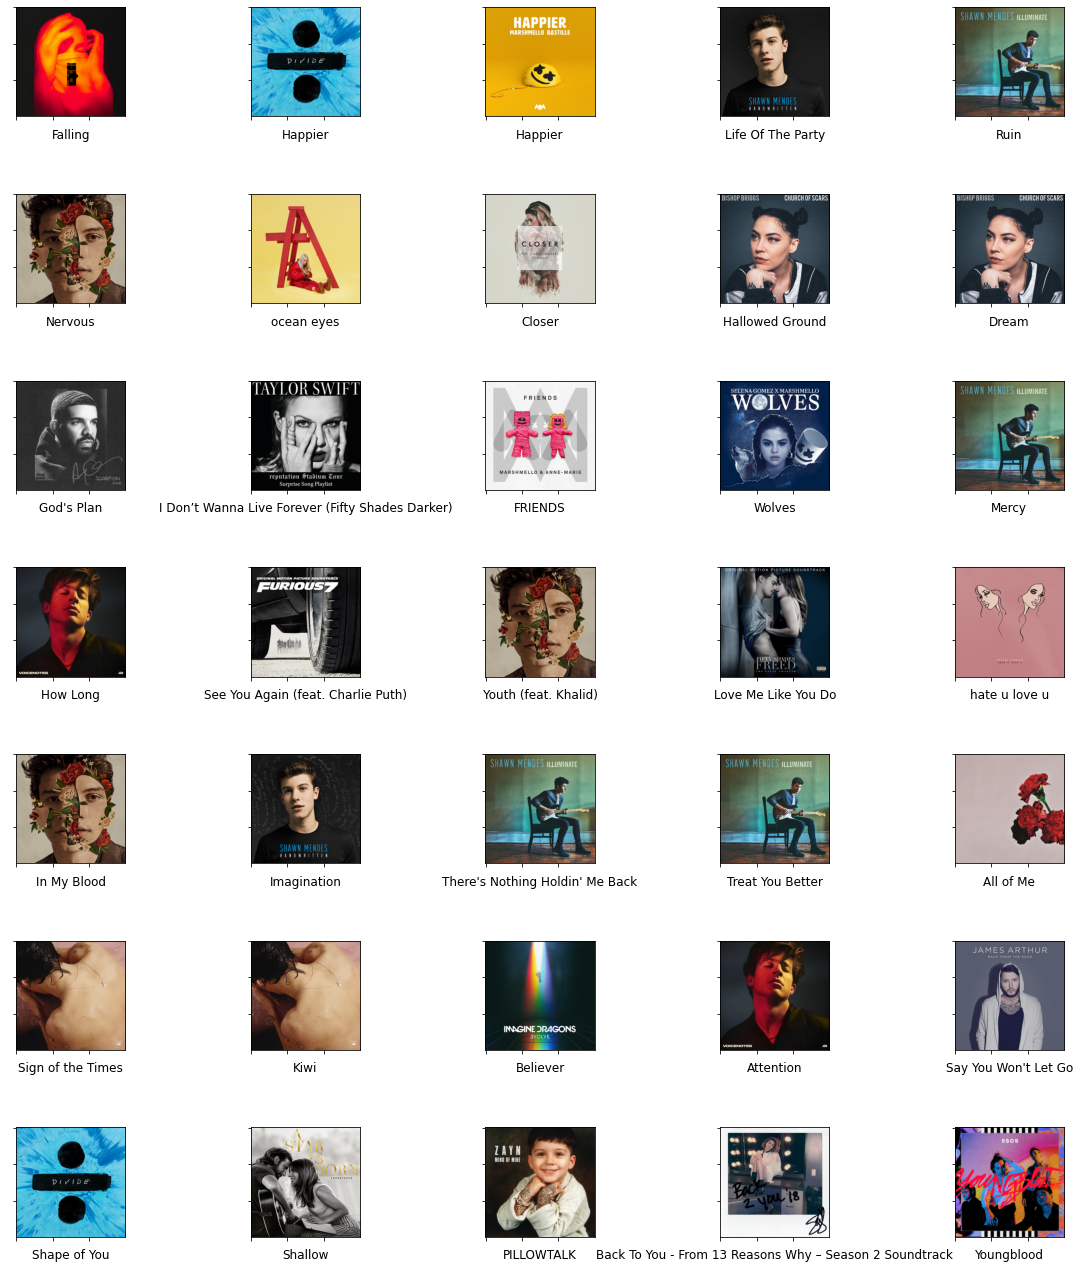

In [119]:
visualize_songs(playlist_mine)

# Create Playlist Vector

In [120]:
def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    """ 
    Summarize a user's playlist into a single vector

    Parameters: 
        complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
        playlist_df (pandas dataframe): playlist dataframe
        weight_factor (float): float value that represents the recency bias. The larger the recency bias, the most priority recent songs get. Value should be close to 1. 
        
    Returns: 
        playlist_feature_set_weighted_final (pandas series): single feature that summarizes the playlist
        complete_feature_set_nonplaylist (pandas dataframe): 
    """
    
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['track_id'].isin(playlist_df['track_id'].values)]#.drop('id', axis = 1).mean(axis =0)
    complete_feature_set_playlist = complete_feature_set_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['track_id'].isin(playlist_df['track_id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = complete_feature_set_playlist.sort_values('date_added',ascending=False)

    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    #print(playlist_feature_set_weighted.iloc[:,:-4].columns)
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-4]
    #playlist_feature_set_weighted_final['track_id'] = playlist_feature_set['track_id']
    
    return playlist_feature_set_weighted_final.sum(axis = 0), complete_feature_set_nonplaylist

In [121]:
complete_feature_set_playlist_vector_mine, complete_feature_set_nonplaylist_mine = generate_playlist_feature(complete_feature_set, playlist_mine, 1.09)

In [122]:
complete_feature_set_playlist_vector_mine.shape

(68,)

# Generating Recommendations

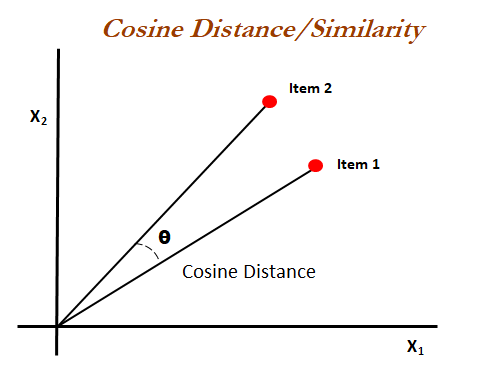

In [3]:
from IPython.display import Image
Image('cs.png')

### I am using cosine similarity to compare playlist vector against every single songs to generate the recommendations

In [129]:
def generate_playlist_recos(df, features, nonplaylist_features):
    non_playlist_df = df[df['track_id'].isin(nonplaylist_features['track_id'].values)]
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('track_id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_50 = non_playlist_df.sort_values('sim',ascending = False).head(50)
    non_playlist_df_top_50['url'] = non_playlist_df_top_50['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_50

In [130]:
mine_top50 = generate_playlist_recos(sp_df, complete_feature_set_playlist_vector_mine, complete_feature_set_nonplaylist_mine)

In [131]:
mine_top40

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,time_signature,valence,name,genre,popularity,mean_popularity,popularitybucket,cat_tempo,sim,url
13491,JONAS BLUE,RISE,3u1S1OmAUhx5DRlLrXqyp3,0.32300,0.690,194408,0.784,0.000000,C#,0.2030,...,4/4,0.669,RISE,"[Dance, Pop]","[86, 86]",86.000000,17,5,0.933483,https://i.scdn.co/image/ab67616d00001e02ffe7d2...
9010,THE CHAINSMOKERS,HOPE,4BiiOzZCrXEzHRLYcYFiD5,0.48800,0.773,180120,0.699,0.000004,C#,0.0814,...,4/4,0.513,HOPE,"[Dance, Pop]","[88, 88]",88.000000,17,5,0.932981,https://i.scdn.co/image/ab67616d00001e028e26bf...
9029,ZEDD,THE MIDDLE,09IStsImFySgyp0pIQdqAc,0.17100,0.753,184732,0.657,0.000000,G,0.1120,...,4/4,0.437,THE MIDDLE,"[Dance, Pop]","[87, 88]",87.500000,17,5,0.932520,https://i.scdn.co/image/ab67616d00001e02fbe22d...
13616,RUDIMENTAL,"THESE DAYS (FEAT. JESS GLYNNE, MACKLEMORE & DA...",5CLGzJsGqhCEECcpnFQA8x,0.19400,0.653,210773,0.809,0.000000,C,0.1650,...,4/4,0.550,"THESE DAYS (FEAT. JESS GLYNNE, MACKLEMORE & DA...","[Dance, Pop]","[85, 85]",85.000000,17,5,0.932407,https://i.scdn.co/image/ab67616d00001e02e9f49a...
13513,LUIS FONSI,IMPOSIBLE,3ao3OVxHlb3C08vAaApUlm,0.12200,0.786,163880,0.764,0.000000,B,0.1020,...,4/4,0.913,IMPOSIBLE,"[Dance, Pop]","[88, 88]",88.000000,17,5,0.932001,https://i.scdn.co/image/ab67616d00001e021e4dff...
13472,DUA LIPA,KISS AND MAKE UP,7jr3iPu4O4bTCVwLMbdU2i,0.06580,0.678,189173,0.729,0.000000,G#,0.3030,...,4/4,0.643,KISS AND MAKE UP,"[Dance, Pop]","[87, 87]",87.000000,17,5,0.931889,https://i.scdn.co/image/ab67616d00001e021764e1...
9081,ANNE-MARIE,2002,2BgEsaKNfHUdlh97KmvFyo,0.03720,0.697,186987,0.683,0.000000,C#,0.1370,...,4/4,0.603,2002,"[Dance, Pop]","[86, 86]",86.000000,17,5,0.931654,https://i.scdn.co/image/ab67616d00001e0238aae7...
13474,RITA ORA,LET YOU LOVE ME,6xtcFXSo8H9BZN637BMVKS,0.28800,0.531,190000,0.854,0.000000,A#,0.0773,...,4/4,0.456,LET YOU LOVE ME,"[Dance, Pop, R&B]","[86, 87, 87]",86.666667,17,5,0.931454,https://i.scdn.co/image/ab67616d00001e02c2d807...
13587,CLEAN BANDIT,SOLO (FEAT. DEMI LOVATO),6kPJZM97LwdG9QIsT7khp6,0.04410,0.737,222653,0.636,0.000067,B,0.3500,...,4/4,0.565,SOLO (FEAT. DEMI LOVATO),"[Dance, Pop]","[87, 87]",87.000000,17,5,0.931336,https://i.scdn.co/image/ab67616d00001e0267eda2...
8996,ARIANA GRANDE,MAKE UP,27356GVuMPFWiJSZCragoM,0.08440,0.671,140693,0.714,0.000001,G,0.0568,...,3/4,0.477,MAKE UP,"[Dance, Pop]","[87, 87]",87.000000,17,5,0.931257,https://i.scdn.co/image/ab67616d00001e0256ac7b...


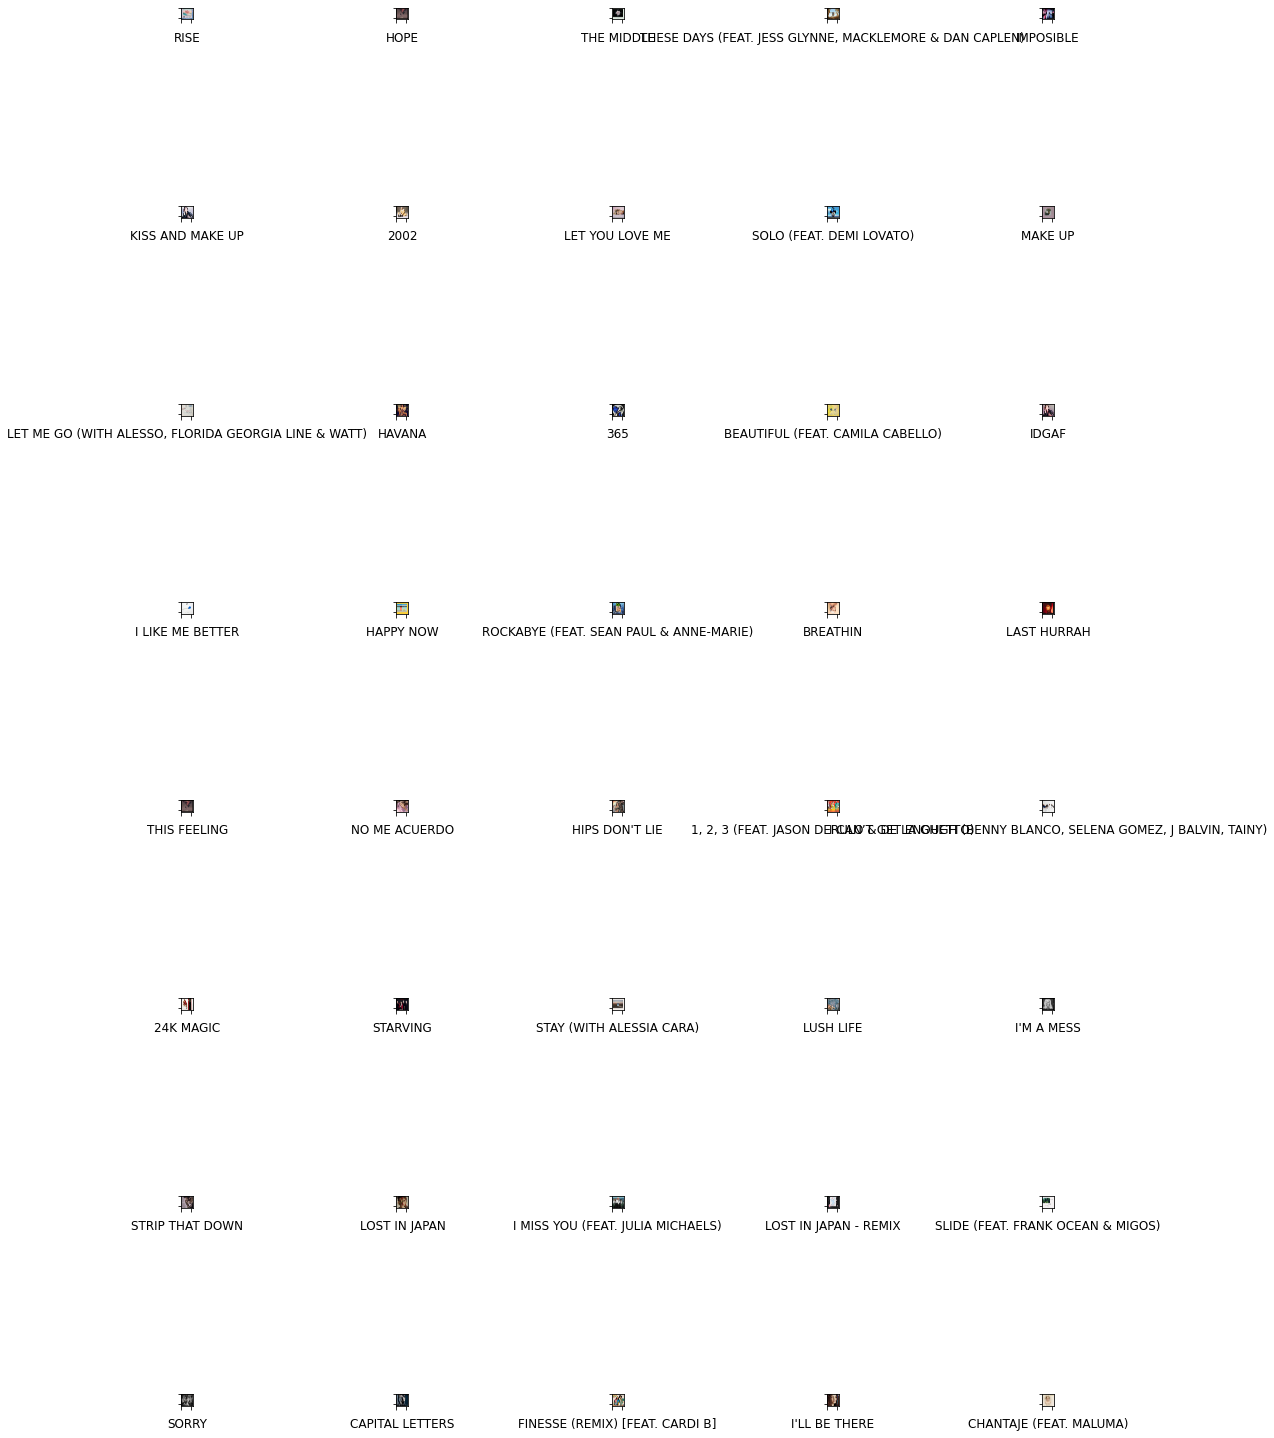

In [132]:
visualize_songs(mine_top40)